# Project Benson

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import calendar
%matplotlib inline

In [739]:
# get links for july 2015
link_prefix = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_"
dates = [150704, 150711, 150718, 150725]
files = []

for i in range(len(dates)):
    files.append(link_prefix + str(dates[i]) + ".txt")


In [740]:
# read data into pandas
dfs = [pd.read_csv(f) for f in files]
df = pd.concat(dfs)

In [742]:
# make columns lowercase and strip out spaces
df.columns = map(lambda x: x.strip(), df.columns)
df.columns = map(lambda x: x.lower(), df.columns)

In [756]:
len(df.station.unique())

384

In [565]:
# list of focus stations based on income and college data
stations = ['GRD CNTRL-42 ST', 'JAMAICA-179 ST', 'LEXINGTON AV/53', 
            'ROOSEVELT IS', 'SOUTH FERRY', 'WALL ST', 'HIGH ST', 
            'BOROUGH HALL/CT', 'JAY ST-METROTEC', 'YORK ST', 
            'QUEENSBORO PLZ', '34 ST-HERALD SQ', '77 ST', '68ST-HUNTER COL',
            'RECTOR ST', '86 ST', 'CORTLANDT ST', '47-50 ST-ROCK', '72 ST',
            '23 ST-5 AVE', '23 ST', '23 ST-6 AVE', '34 ST-PENN STA', 
            '28 ST-BROADWAY', '28 ST', '14 ST', '14 ST-UNION SQ', '14 ST-6 AVE', 
            'SPRING ST', 'PARK PLACE']

In [566]:
# filter for focus stations
df_stations = df[df['station'].isin(stations)]

In [567]:
# prevent warnings going forward for slicing data
df_stations.is_copy = False

In [568]:
#add datetime
df_stations['datetime'] = pd.to_datetime(df_stations.date + ' ' + df_stations.time)

In [569]:
# split date.time into separate date and time
df_stations['time'] = list(map(lambda x: x.time(), df_stations.datetime))
df_stations['date'] = list(map(lambda x: x.date(), df_stations.datetime))

In [570]:
# add column for day of week
df_stations['day_of_week'] = [calendar.day_name[i.weekday()] for i in df_stations.datetime ]

In [571]:
# function to calculate net entires and exits
net_entries = []
net_exits = []
for i in range(len(df_stations['entries'])-1):
    if df_stations.iat[i+1,2] == df_stations.iat[i,2] and df_stations.iat[i+1,3] == df_stations.iat[i,3]:
        net_entries.append(df_stations.iat[i+1,9] - df_stations.iat[i,9]) # use iat to find individual cells
        net_exits.append(df_stations.iat[i+1,10] - df_stations.iat[i,10])
    else:
        net_entries.append(0)
        net_exits.append(0)
        
net_entries.append(0)
net_exits.append(0)

In [572]:
# similar function to calculate net time
net_time = []

for i in range(len(df_stations['time'])-1):
    if df_stations.iat[i+1,2] == df_stations.iat[i,2] and df_stations.iat[i+1,3] == df_stations.iat[i,3]:
        net_time.append((df_stations.iat[i+1,11] - df_stations.iat[i,11])) 
    else:
        net_time.append(float(0))
        
net_time.append(float(0))

In [573]:
# create new columns for net entries, exits and time
df_stations['net_entries'] = net_entries
df_stations['net_exits'] = net_exits
df_stations['net_time'] = net_time

In [574]:
# filter out entries/exits that are either too high or negative
df_stations = df_stations[df_stations['net_entries'] > 0]
df_stations = df_stations[df_stations['net_entries'] < 5000]
df_stations = df_stations[df_stations['net_exits'] < 5000]
df_stations = df_stations[df_stations['net_exits'] > 0]

In [575]:
# calulate total traffic number
df_stations['traffic'] = df_stations.net_entries + df_stations.net_exits

In [626]:
# group for total traffic for each station/linename combo
day_traffic = df_stations.groupby(['station', 'linename']).sum().sort_values('traffic', ascending = False)

In [627]:
# reset index to put groupby object in better format
day_traffic = day_traffic.reset_index()

In [643]:
# create station linename column for graph
traffic_density['stat_line'] = day_traffic.station + ' ' + day_traffic.linename

In [647]:
traffic_density = traffic_density.sort(['traffic'], ascending = False)

/Users/colekev/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


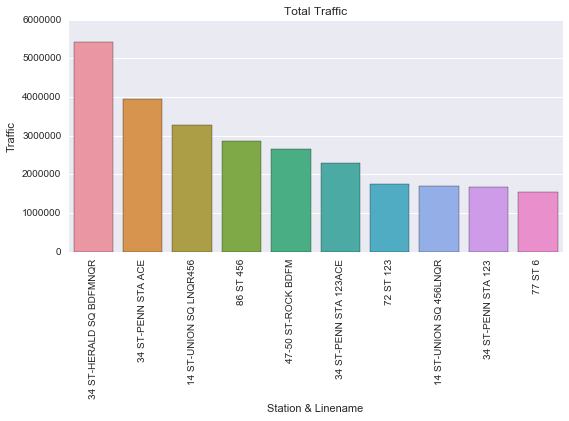

In [649]:
sns.factorplot('stat_line', 'traffic', data = df2, kind = 'bar', aspect = 2)
plt.xticks(rotation=90)
plt.xlabel('Station & Linename')
plt.ylabel('Traffic')
plt.title("Total Traffic")

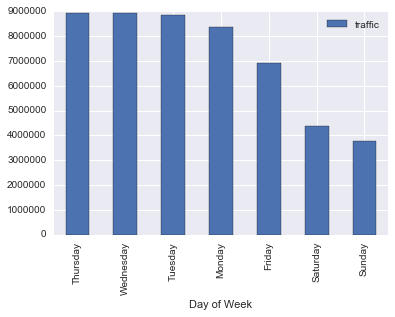

In [443]:
day_traffic.plot(kind='bar', x='day_of_week', y='traffic')
plt.xlabel('Day of Week')

In [459]:
stations = df_stations.groupby(by =['station', 'linename', '']).sum().sort_values('traffic', ascending = False)

In [460]:
stations = stations.reset_index()

In [461]:
top_stations = stations.sort('traffic', ascending = False)

/Users/colekev/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [463]:
top_stations.head(16)

station linename       entries         exits  net_entries  \
0   34 ST-HERALD SQ  BDFMNQR   70551495230   46125938674      2844340   
1    34 ST-PENN STA      ACE  243559065385   89694762702      2046226   
2    14 ST-UNION SQ  LNQR456  187821956091   71364751535      1766651   
3             86 ST      456   34086518703   30814799664      1509946   
4     47-50 ST-ROCK     BDFM   39333106264   30881736655      1312048   
5    34 ST-PENN STA   123ACE   30388278364   11850605744      1355076   
6             72 ST      123   16029749693   12345361481       909824   
7    14 ST-UNION SQ  456LNQR   21323452844    9581400754       867120   
8    34 ST-PENN STA      123   20715933684   18573161472       815248   
9             77 ST        6  210546001199   34688379112       793300   
10  JAY ST-METROTEC      ACF   41644830655   10147874278       836609   
11  BOROUGH HALL/CT    2345R   18837884064   11595502435       798632   
12          WALL ST       23   17168918982   15038151553       589699   
13  68ST-HUNTER COL        6   18949084730   16039054691       691348   
14            28 ST        6  249494941330  326314797260       545792   
15            23 ST        6  341184288655  284321212513       544015   

    net_exits  traffic  
0     2587280  5431620  
1     1893490  3939716  
2     1517637  3284288  
3     1362758  2872704  
4     1354337  2666385  
5      941289  2296365  
6      845173  1754997  
7      834179  1701299  
8      857862  1673110  
9      740500  1533800  
10     503339  1339948  
11     535646  1334278  
12     579042  1168741  
13     445443  1136791  
14     537050  1082842  
15     489213  1033228

In [ ]:
stations = four_hour.groupby(by =['station', 'linename', 'day_of_week','time']).sum().sort_values('traffic', ascending = False)

In [464]:
stations.to_csv('~/Desktop/top_15_stations.csv')

In [533]:
station = "14 ST-UNION SQ"
linename = "23"

station = df_stations[df_stations['station'] == station]
#station = station[station['linename'] == linename]


In [534]:
day_traffic = station.groupby(['mid_time']).sum().sort_values('traffic', ascending = False)

In [535]:
day_traffic = day_traffic.reset_index()

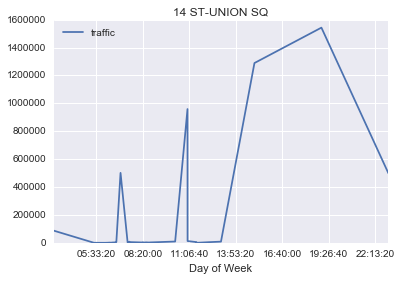

In [537]:
day_traffic.plot(x='mid_time', y='traffic')
plt.xlabel('Day of Week')
plt.title("14 ST-UNION SQ")